<!--BOOK_INFORMATION-->
*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

# Reading
Python Programming and Numerical Methods, 
[Chapter 9. Representation of Numbers](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter09.00-Representation-of-Numbers.html)

# Problems

## 1. Write a function *my_bin_2_dec(b)*
where *b* is binary number represented by a list of ones and zeros. The last element of *b* represents the coefficient of $2^0$, the second-to-last element of b represents the coefficient of $2^1$, and so on. The output variable, *d*, should be the decimal representation of b. The test cases are provided below. 

In [89]:
# We are going to get an input of a list of ones and zeros and convert it to the decimal representation of b. 
def my_bin_2_dec(b):
    # Start by taking the length of the list
    len_list = len(b)
    
    # Now that we have the length of the list, let us move index by index
    n = len_list - 1 # Starting exponent for last element in list. Subtract by 1 because the lat element will have 2^0
    numbers_in_list = [] # Collect all the numbers to add up at the end
    for i in b:
        value = i * 2**n
        numbers_in_list.append(value)

        n -= 1 # Increase index

    d = sum(numbers_in_list)
    print(numbers_in_list)
    return d

In [90]:
# Output: 7
my_bin_2_dec([1, 1, 1])

[4, 2, 1]


7

In [91]:
# Output: 85
my_bin_2_dec([1, 0, 1, 0, 1, 0, 1])

[64, 0, 16, 0, 4, 0, 1]


85

In [92]:
# Output: 33554431
my_bin_2_dec([1]*25)

[16777216, 8388608, 4194304, 2097152, 1048576, 524288, 262144, 131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64, 32, 16, 8, 4, 2, 1]


33554431

## 2. Write a function *my_dec_2_bin(d)*
where *d* is a positive integer in decimal, and *b* is the binary representation of *d*. The output *b* must be a list of ones and zeros, and the leading term must be a 1 unless the decimal input value is 0. The test cases are provided below. 

In [93]:
import numpy as np

# We are now taking a positive integer and changing it into binary
def my_dec_2_bin(d):
    # We will start by finding the largest 2^n power
    para = False # Parameter to check against in next loop
    list_of_n = [] # List to include the number of n(s), or exponents, we find for the breakdown of the number d
    total = d

    # Base case if d = 0
    if d == 0:
        b = 0
    # Loop over two whole statements when you find the largest 2**n for the value d, subtract it, and repeat
    else:
        # Loop until we get a list of n(s) for our number
        while(para == False):
            if total <= 1:
                if total == 1: # In the case of odds, we need 2^0 = 1
                    list_of_n.append(0)
                para = True
            else:
                n = 0 # Starting power of n
                para_2 = False
                while(para_2 == False):
                    if total < 2**(n+1): # Check to see if total is smaller than 2^n term. Keep reapting until it gets bigger than total
                        list_of_n.append(n)
                        total -= 2**n # Subtract total so when we loop again we can fin dthe next biggest factor of 2^n
                        para_2 = True
                    else:
                        n += 1
        

        b = np.zeros(list_of_n[0] + 1) # Create a list of zeros for all the elements in our binary

        # Using the n values we know, search for the positions where it would exist in the binary list and make it 1. 
        for i in list_of_n:
            b[len(b) - i - 1] = 1
        
    return b

In [94]:
# Output: [0]
my_dec_2_bin(0)

0

In [95]:
# Output: [1, 0, 1, 1, 1]
print(my_dec_2_bin(23))

[1. 0. 1. 1. 1.]


In [96]:
# Output: [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
print(my_dec_2_bin(2097))

[1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.]


## 3. Compute *d = my_bin_2_dec(my_dec_2_bin(12654))*
Use the two functions you wrote in problems 1 and 2. Do you get the same number?

In [ ]:
d = my_bin_2_dec(my_dec_2_bin(12654))
print(d)

# Yes! We got the same number 

[8192.0, 4096.0, 0.0, 0.0, 0.0, 256.0, 0.0, 64.0, 32.0, 0.0, 8.0, 4.0, 2.0, 0.0]
12654.0


## 4. Write a function *my_bin_adder(b1,b2)*
where *b1*, *b2* and the output variable *b* are binary numbers represented as in problem 1. The output variable should be computed as *b = b1 + b2*. Do not use your functions from problems 1 and 2 to write this function (i.e., do not convert *b1* and *b2* to decimal; add them, and then convert the result back to binary). This function should be able to accept inputs *b1* and *b2* of any length (i.e., very long binary numbers), and *b1* and *b2* may not necessarily be the same length.

In [193]:
# The goal here is to start from the very last elements and use modolus to decide if the new binary will have a 0 or 1 depending on three factors
# If we have 0 + 0, then we get 0 in that spot. If we have, 0 + 1 or 1 + 0, we have 1. If we have 1 + 1, we have to have 0 but it gets carried
# to the next term. If we have a carried 1 with 0 + 1 we have 0 and it is also carried.
from collections import deque

def my_bin_adder(b1, b2):
    
    # We are going to start by making the lists the same length since the number of zeros before the binary doesn't matter (besides taking up room)
    # We will use the deque library I found that does easy pop/appending
    b1 = deque(b1)
    b2 = deque(b2)

    # Check to see which list needs to be appended. If they are the same, this is zero
    if len(b1) >= len(b2):
        difference = len(b1) - len(b2)
        for i in range(difference):
            b2.appendleft(0)
        big_l = b1 # The bigger list

    elif len(b2) > len(b1):
        difference = len(b2) - len(b1)
        for i in range(difference):
            b1.appendleft(0)
        big_l = b2 # The bigger list
    
    added_binary = deque(np.zeros(len(big_l))) # List for our final product

    n = 0
    carrier = 0
    for j in range(len(big_l)):

        end_index = len(big_l) - 1 - n # Last element index that moves through list from end to beginning
        added_number = b1[end_index] + b2[end_index]
        modded_number = added_number % 2

        if carrier == 0:
            final_number = modded_number
            if added_number == 2:
                carrier = 1

        elif carrier == 1:
            if added_number == 0:
                final_number = modded_number + 1
                carrier = 0 
            elif added_number == 1 or added_number == 2: # Should return 0 with carry 1
                final_number = (added_number + 1) % 2
                carrier = 1

        added_binary[end_index] = final_number
        
        n += 1

    if carrier == 1:
        added_binary.appendleft(1)

    return list(added_binary)

In [194]:
# Output: [1, 0, 0, 0, 0, 0]
my_bin_adder([1, 1, 1, 1, 1], [1])

[1, 0, 0, 0, 0, 0]

In [195]:
# Output: [1, 1, 1, 0, 0, 1, 1]
my_bin_adder([1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 0])

[1, 1, 1, 0, 0, 1, 1]

In [196]:
# Output: [1, 0, 1, 1]
my_bin_adder([1, 1, 0], [1, 0, 1])

[1, 0, 1, 1]

## 5. What is the effect of allocating more bits to the fraction versus the characteristic and vice versa? What is the effect of allocating more bits to the sign?

More bits to the fraction means we can get a higher level of accuracy and reduce rounding errors while more bits to the characteristic means that you have a wider range of values to choose from to avoid overflow/underflow (ie you can do extremely larger numbers or extremely small ones without python making them inf or 0, respectively). Allocating more bits to the sign would be a waste of bits and memory since we already can determine the sign off of a single bit. 

## 6. Write a function *my_ieee_2_dec(ieee)*
where *ieee* is a string contains 64 characters of ones and zeros representing a 64-bit IEEE754 number. The output should be *d*, the equivalent decimal representation of *ieee*. The input variable *ieee* will always be a 64-element string of ones and zeros defining a 64-bit float. 

In [378]:
from collections import deque
from decimal import Decimal, getcontext # Need this because my decimal kept rounding

getcontext().prec = 40 # Decimal number

def my_ieee_2_dec(ieee):
    # We are going to split this given number into three lists, one for sign, one for exponent, and one for the fraction
    sign = int(ieee[0])
    exponent = list(map(int, ieee[1:11]))
    fraction = list(map(int, ieee[12:64]))

    total_exponent = 0 # Total to keep track
    n = len(exponent)
    for i in exponent:
        total_exponent += (i * 2**n)
        n -= 1
        
    total_exponent -= 1023 # Following equation subtract 1023

    n = 1
    total_fraction = 0
    base = Decimal(0.5)
    for i in fraction:
        total_fraction += i * (base ** n)
        n += 1
    

    # Now we can do the main function
    number = ((-1) ** sign) * (2 ** total_exponent) * (1 + total_fraction)

    return print(number)

In [379]:
# Output: -48
ieee = '1100000001001000000000000000000000000000000000000000000000000000'
my_ieee_2_dec(ieee)

-48.00000000000000000000000000000000000000


In [ ]:
# Output: 3.39999999999999991118215802999
ieee = '0100000000001011001100110011001100110011001100110011001100110011'
my_ieee_2_dec(ieee)

# Not sure if you wanted that specific amount of decimals or not

3.399999999999999911182158029987476766110


## 7. Write a function *my_dec_2_ieee(d)*
where *d* is a number in decimal and output variable *ieee* is a string with 64 characters of ones and zeros representing the 64-bit IEEE754 closest to *d*. You can assume that *d* will not cause an overflow for 64-bit *ieee* numbers.

In [139]:
import math
import numpy as np

def my_dec_2_ieee(d, correct_binary):
    binary_list = np.zeros(64) # Empty list of zeros

    if d < 0:
        binary_list[0] = 1
    elif d >= 0:
        binary_list[0] = 0

    d = abs(d) # Ignore the sign for the next steps

    # Find Exponent ---------
    
    # Start by finding the exponent 
    exponent = math.floor(math.log2(d))
    biased_exponent = exponent + 1023 # add the bias, now we can find the binary of this number
    
    for i in range(11):

        binary_list[11 - i] = biased_exponent % 2 # We need the remainder. This also flips the order since we typical represent this as 2^10, 2^9, etc
        biased_exponent //= 2

    # Determine the decimal ----

    # Start by following chapter 9's notes where they did 15/8 - 1 (or d/2^e - 1) to get our leftover decimal
    normalized_fraction = d/(2**exponent) - 1

    for i in range(52):

        normalized_fraction *= 2

        if normalized_fraction >= 1:
            binary_list[i+12] = 1
        elif normalized_fraction < 1:
            binary_list[i + 12] = 0

        normalized_fraction %= 1

    # I added this because I was having a hard time comparing the two lists
    comparison_list = ''.join(list(map(str, binary_list.astype(int))))
    print(comparison_list)
    print(correct_binary)
    print(comparison_list == correct_binary)
    
    ieee = binary_list
    return print(ieee)

In [140]:
Output = '0100000000101110010111101010001110011100001100011010010001101000'

d = 15.18484199625 # Note, the original 1.5 one wasnt the correct decimal for this output (I think)
my_dec_2_ieee(d, Output)

0100000000101110010111101010001110011100001100011010010001101000
0100000000101110010111101010001110011100001100011010010001101000
True
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.]


In [142]:
Output = '1100000001110011010100100100010010010001001010011000100010010000'

d = -309.141740
my_dec_2_ieee(d, Output)

1100000001110011010100100100010010010001001010011000100010010000
1100000001110011010100100100010010010001001010011000100010010000
True
[1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


In [143]:
Output = '1100000011011000101010010000000000000000000000000000000000000000'

d = -25252
my_dec_2_ieee(d, Output)

1100000011011000101010010000000000000000000000000000000000000000
1100000011011000101010010000000000000000000000000000000000000000
True
[1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 8. Define *ieee_baby*
to be a representation of numbers using 6 bits where the first bit is the sign bit, the second and third bits are allocated to the characteristic, and the fourth, fifth, and sixth bits are allocated to the fraction. The normalization for the characteristic is 1.

 - Write all the decimal numbers that can be represented by *ieee_baby*. 
 - What is the largest/smallest gap in *ieee_baby*?

Let us start by considering what the highest and lowest numbers we can get on ieee baby are (non-zero and non-negative): We would want to consider that we have 0 00 001 as our smallest term so we have (ignoring the sign) our fraction term equal to 0(1/2^-1) + 0(1/2^-2) + 1(1/2^-3) which is 1/8 or 0.125. Then, our largest term is 0 11 111 such that our fraction is 0.875 and our exponent is 2 then we have (-1)^0 * 2^(2-1) * (1 + 0.875) = 3.75. The number of representations we can get between these bits is a permutation of 6 digits with two choices each. So, we get 2^6 = 64 numbers between -3.75 and 3.75. All numbers are listed below. We call one number to the next the gap, so the smallest would be what we added each time in the function below, 0.125. The largest would be between -3.75 and 3.75, so that is 7.5.


In [ ]:
number = -3.75
for i in range(61): # We use 61 because we have our initial number already, the index starts at 0, and the print statement before the addition all subtract 1 from 64 range.
    print(number)
    number += 0.125

-3.75
-3.625
-3.5
-3.375
-3.25
-3.125
-3.0
-2.875
-2.75
-2.625
-2.5
-2.375
-2.25
-2.125
-2.0
-1.875
-1.75
-1.625
-1.5
-1.375
-1.25
-1.125
-1.0
-0.875
-0.75
-0.625
-0.5
-0.375
-0.25
-0.125
0.0
0.125
0.25
0.375
0.5
0.625
0.75
0.875
1.0
1.125
1.25
1.375
1.5
1.625
1.75
1.875
2.0
2.125
2.25
2.375
2.5
2.625
2.75
2.875
3.0
3.125
3.25
3.375
3.5
3.625
3.75


## 9. Use the *np.spacing* function to determine the smallest number such that the gap is 1.

2.0
1.0
0.5


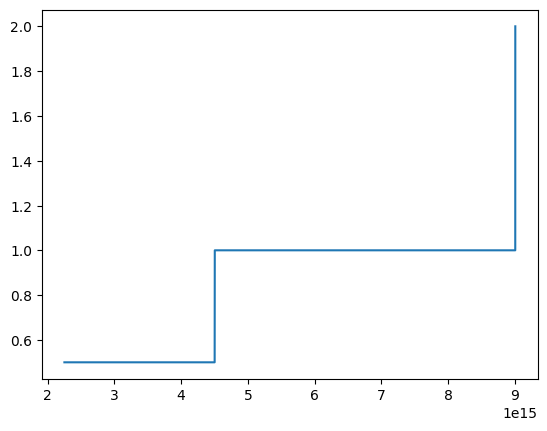

In [ ]:
import numpy
import matplotlib.pyplot as plt

# Use this to narrow down our search
n = 0
x = 1
while(np.spacing(x) < 1):
    x = 2**n
    n += 1

print(np.spacing(2**53))
print(np.spacing(2**52))
print(np.spacing(2**51))

# So our smallest number is on the order of 2**52

x_array = np.linspace(2**51, 2**53, 10000)
y_array = []
for i in x_array:
    y = np.spacing(i)
    y_array.append(y)

plt.plot(x_array, y_array)
plt.show()

# Thus, it appears our smallest number is in fact 2**52 or roughly 4.5035996e+15.

## 10. What are some of the advantages and disadvantages of using binary versus decimal?

Binary is what computers work in, so it is much more efficient to store data through binary. We can also use binary to not only store numbers like decimals but also other data types. Futhermore, you can store extremely long decimals without worrying so much about overflow/underflow and python rounding to 0 or setting a variable as inf. The downside of binary is that it is not as human friendly as decimal form. It's a lot easier for me to see 120.5 and interpret that than to understand 1111000.1. 

## 11. Write the number 13 (base10) in base1. How would you do addition and multiplication in base1?

The number 13 (base 10) is the decimal form, so base 1 is the form where the number of tally marks represent the number. For example, no tally marks is 0, I is 1, II is two, and so on. So, we have IIIIIIIIIIIII (I found that it is also represented as 1 instead of I). SO we have 13 I's. To do addition on base 1, we would need to add onto the list of I's. So, 2 base 1 + 4 base 1 = 6 base 1 = II + IIII = IIIIII. Multiplication is again similar to tradition numbers where we multiply a group by the number in the other group. As an example, we can have 3 base 1 * 4 base 1 = 12 base 1 = IIII + IIII + IIII = IIIIIIIIIIII.

## 12. How high can you count on your fingers if you count in binary?

Ten fingers means you can have a representation of 2^n for 0 through 9. Therefore, if we have the binary 111111111 (or 9 1's) we get that 
2^9 + 2^8 + 2^7 + 2^6 + 2^5 + 2^4 + 2^3 + 2^2 + 2^1 + 2^0 = 1023
which is the higest number can can count up to.

## 13. Let *b* be a binary number having *n* digits. Can you think of ways to multiply and divide *b* by 2 that does not involve any arithmetic? Hint: Think about how you multiply and divide a decimal number by 10.

Binary numbers are in base 2, so they function similarly to how 1.4 * 10 = 14 and shifts the decimal. For example, every time you multiply by 2 we will shift right, and dividing by 2 shifts it left. For example, if we have (10 base 2) / 2 = 5 base 2 = 1010 (binary of 10) / 2 = 101 which checking with the definition of 5 base 2 is correct. Similarily, we have 10 base 2 * 2 = 20 base 2 = 10100.